Gå tilbake til [← innledningen](miljoanalyseprosjekt.ipynb) eller [← del 1](del1.ipynb) av prosjektet

#### Oppgaver: Oversikt
I mappe del 2 bygger vi videre på prosjektet gjennom følgende tilleggsoppgaver: Oppgave 4, benytte NumPy og Pandas for å analysere dataene og beregne statistiske mål som gjennomsnitt og standardavvik. I oppgave 5 skal vi lage informative visualiseringer av de analyserte dataene ved hjelp av Matplotlib, og eventuelt utforske interaktive visualiseringer. I oppgave 6 fokuserer dere på prediktiv analyse ved å implementere lineær regresjon for å forutsi fremtidige miljøforhold basert på historiske data. Til slutt, i oppgave 7 skal dere reflektere over læringsprosessen, erfaringer og vurderinger av prosjektet (maks 800 ord).

#### Oppgave 4: Dataanalyse
I denne delen av prosjektet skal dere bruke verktøy som NumPy, Pandas, Matplotlib osv. til å beregne statistiske mål som gjennomsnitt, median og standardavvik, som er essensielle for å forstå datakvaliteten og identifisere trender. Videre vil dere implementere enkle statistiske analyser for å avdekke mønstre i dataene, noe som kan gi innsikt i miljøforholdene over tid. Denne analysen vil danne grunnlaget for videre visualisering og prediktiv analyse, og bidra til en dypere forståelse av de miljømessige faktorene som påvirker samfunnet.

Vurderingskriterier:

Hvordan kan du bruke NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for de innsamlede dataene, og hvorfor er disse statistiske målene viktige?

Kan du gi et eksempel på hvordan du vil implementere en enkel statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet?

Hvordan planlegger du å håndtere eventuelle skjevheter i dataene under analysen, og hvilke metoder vil du bruke for å sikre at analysen er pålitelig?

Hvilke visualiseringer vil du lage for å støtte analysen din, og hvordan vil disse visualiseringene hjelpe deg med å formidle funnene dine?

#### Oppgave 5: Visualisering
Denne oppgaven fokuserer på bruken av Matplotlib og Seaborn for å skape informative og engasjerende visualiseringer av de analyserte miljødataene. I denne delen av prosjektet skal dere utvikle grafer og diagrammer som eksempelvis illustrerer endringer i luftkvalitet over tid, sammenligning av temperaturdata, og andre relevante trender. Målet er å gjøre dataene mer tilgjengelige og forståelige for et bredere publikum. I tillegg, dersom tiden tillater det, skal dere utforske muligheten for å lage interaktive visualiseringer ved hjelp av Widgets, Plotly eller Bokeh, noe som kan gi brukerne en mer dynamisk opplevelse av dataene.

Vurderingskriterier:

Hvilke spesifikke typer visualiseringer planlegger du å lage for å representere eksempelvis endringer i luftkvalitet og temperaturdata, og hvorfor valgte du disse?

Hvordan kan Matplotlib og Seaborn brukes til å forbedre forståelsen av de analyserte dataene, og hvilke funksjoner i disse bibliotekene vil være mest nyttige?

Hvordan vil du håndtere og visualisere manglende data i grafene dine for å sikre at de fortsatt er informative?

Kan du beskrive prosessen for å lage interaktive visualiseringer med Widgets, Plotly eller Bokeh, og hvilke fordeler dette kan gi i forhold til statiske visualiseringer?

Hvordan vil du evaluere effektiviteten av visualiseringene dine i å formidle de viktigste funnene fra dataanalysen til et bredere publikum?

#### Oppgave 6: Prediktiv analyse
Denne oppgaven handler om prediktiv analyse og fokuserer på implementeringen av lineær regresjon ved hjelp av scikit-learn for å forutsi fremtidige miljøforhold basert på historiske data. I denne delen av prosjektet skal dere forberede dataene ved å identifisere relevante funksjoner og målvariabler, samt håndtere eventuelle manglende verdier som kan påvirke modellens nøyaktighet. Deretter vil de trene regresjonsmodellen på de rensede dataene, evaluere dens ytelse ved hjelp av passende metoder som beregning av feilmål, og til slutt bruke modellen til å lage prediksjoner for fremtidige miljøforhold.

Vurderingskriterier:

Lag minst tre forskjellige typer visualiseringer (f.eks. linjediagrammer, søylediagrammer og scatterplots) for å representere endringer i eksempelvis luftkvalitet og temperaturdata over tid. Forklar valget av visualiseringstype for hver graf.

Implementer visualiseringer ved hjelp av Matplotlib og Seaborn. Inkluder tilpassede akser, titler, og fargepaletter for å forbedre lesbarheten og estetikk.

Demonstrer hvordan manglende data håndteres i visualiseringene. Lag en graf som viser hvordan manglende verdier påvirker datatrender, og diskuter hvordan dette kan påvirke tolkningen av dataene.

Skriv en kort evaluering av de utviklede visualiseringene. Diskuter hvilke visualiseringer som var mest effektive for å formidle informasjon, og hvorfor. Reflekter over tilbakemeldinger fra medstudenter eller veileder.

mes: 15.298874936369792
R²-score: 0.26082447951706056


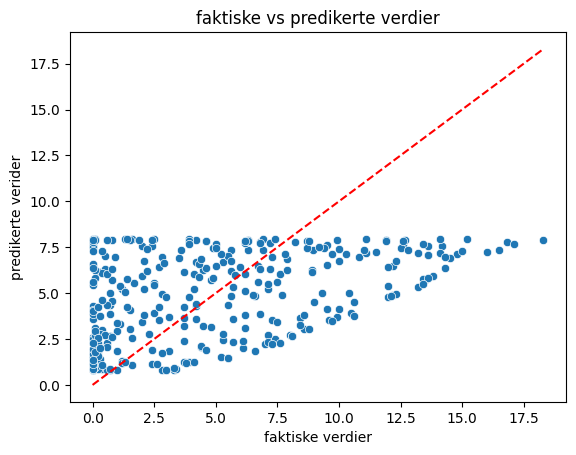

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.linjaer_reg import forbred_data, tren_pred

df, x, y = forbred_data("../data/utfylt_data.csv")
modell, prediksjon = tren_pred(df, x, y)

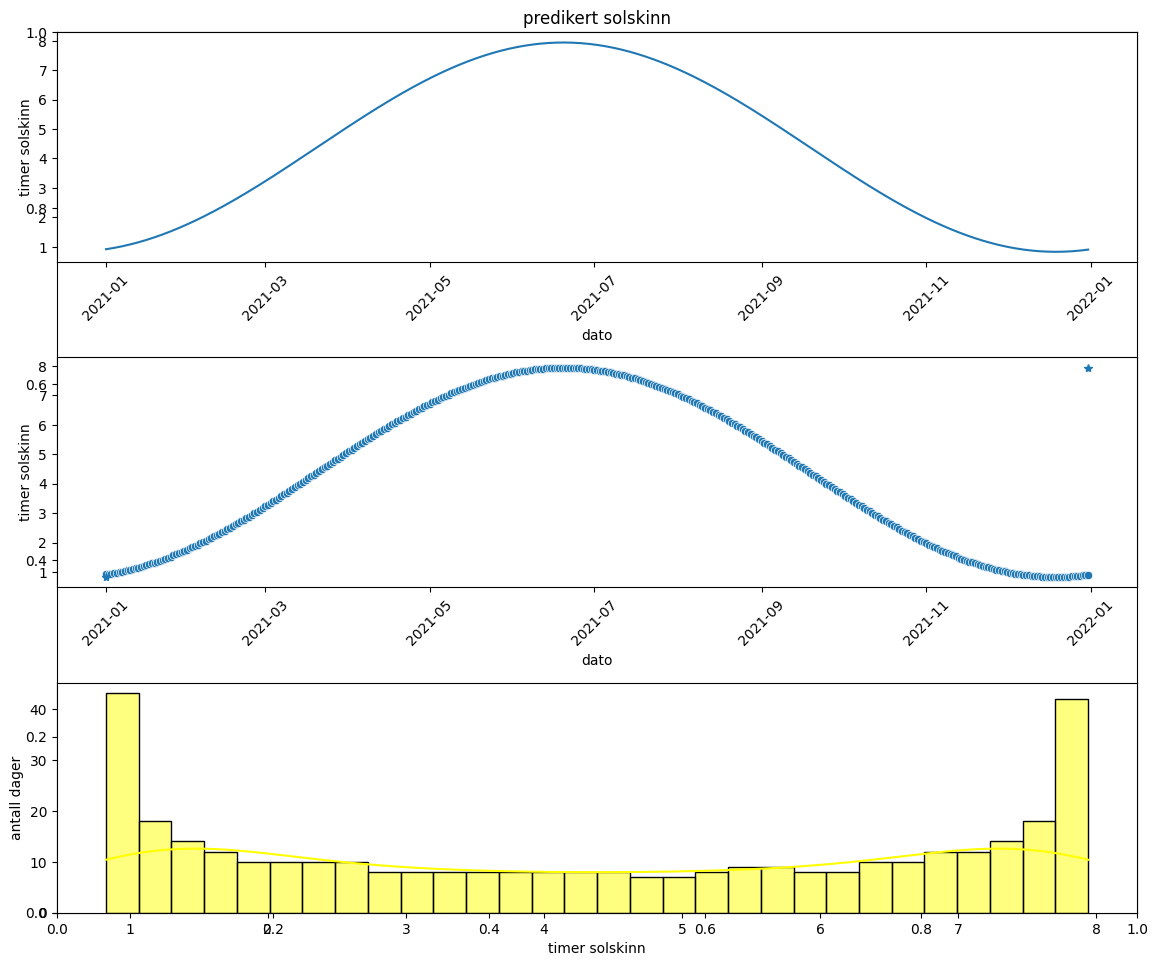

In [2]:
from src.linjaer_reg import vis_fremtid

vis_fremtid(df, modell)

#### Oppgave 7: Refleksjonsnotat
Skriv et refleksjonsnotat (maks 800 ord) etter gjennomføringen av prosjektet. Denne skal inneholde viktige punkter som gir innsikt i deres læringsprosess, erfaringer og vurderinger av prosjektet.

Vurderingskriterier:

Refleksjoner over hva du har lært om datainnsamling, databehandling, dataanalyse og visualisering.

Beskrivelse av nye ferdigheter som ble tilegnet, for eksempel bruk av spesifikke biblioteker (Pandas, NumPy, Matplotlib, etc.) og programmeringskonsepter.

Identifisering av spesifikke utfordringer som oppstod under prosjektet, for eksempel problemer med datakvalitet, håndtering av manglende verdier, eller tekniske problemer med API-er.

Refleksjoner over samarbeidet i gruppen, inkludert hvordan oppgaver ble fordelt og hvordan kommunikasjonen fungerte.

Vurdering av de endelige resultatene, inkludert kvaliteten på visualiseringene og analysene.

Ideer til hvordan prosjektet kan forbedres i fremtiden, både i forhold til tekniske aspekter og prosjektledelse.

Mulige retninger for videre forskning eller utvikling basert på erfaringene fra prosjektet.

Oppsummering av de viktigste læringspunktene og hvordan prosjektet har bidratt til studentenes forståelse av datavitenskap og miljøstudier.

Personlige tanker om hvordan erfaringene fra prosjektet kan anvendes i fremtidige studier eller yrkesliv.

# ta med andre værforhold inni predaktiv analyse

## vurderingskriterer slett!

#### Oppgaver: Oversikt
I mappe del 2 bygger vi videre på prosjektet gjennom følgende tilleggsoppgaver: Oppgave 4 krever bruk av verktøy som NumPy og Pandas for å analysere dataene og beregne statistiske mål som gjennomsnitt og standardavvik. I oppgave 5 skal dere lage informative visualiseringer av de analyserte dataene ved hjelp av Matplotlib, og eventuelt utforske interaktive visualiseringer. I oppgave 6 fokuserer dere på prediktiv analyse ved å implementere lineær regresjon for å forutsi fremtidige miljøforhold basert på historiske data. Til slutt, i oppgave 7 skal dere reflektere over læringsprosessen, erfaringer og vurderinger av prosjektet (maks 800 ord).

#### Oppgave 4: Dataanalyse
I denne delen av prosjektet skal dere bruke verktøy som NumPy, Pandas, Matplotlib osv. til å beregne statistiske mål som gjennomsnitt, median og standardavvik, som er essensielle for å forstå datakvaliteten og identifisere trender. Videre vil dere implementere enkle statistiske analyser for å avdekke mønstre i dataene, noe som kan gi innsikt i miljøforholdene over tid. Denne analysen vil danne grunnlaget for videre visualisering og prediktiv analyse, og bidra til en dypere forståelse av de miljømessige faktorene som påvirker samfunnet.

Vurderingskriterier:

Hvordan kan du bruke NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for de innsamlede dataene, og hvorfor er disse statistiske målene viktige?

Kan du gi et eksempel på hvordan du vil implementere en enkel statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet?

Hvordan planlegger du å håndtere eventuelle skjevheter i dataene under analysen, og hvilke metoder vil du bruke for å sikre at analysen er pålitelig?

Hvilke visualiseringer vil du lage for å støtte analysen din, og hvordan vil disse visualiseringene hjelpe deg med å formidle funnene dine?

#### Oppgave 5: Visualisering
Denne oppgaven fokuserer på bruken av Matplotlib og Seaborn for å skape informative og engasjerende visualiseringer av de analyserte miljødataene. I denne delen av prosjektet skal dere utvikle grafer og diagrammer som eksempelvis illustrerer endringer i luftkvalitet over tid, sammenligning av temperaturdata, og andre relevante trender. Målet er å gjøre dataene mer tilgjengelige og forståelige for et bredere publikum. I tillegg, dersom tiden tillater det, skal dere utforske muligheten for å lage interaktive visualiseringer ved hjelp av Widgets, Plotly eller Bokeh, noe som kan gi brukerne en mer dynamisk opplevelse av dataene.

Vurderingskriterier:

Hvilke spesifikke typer visualiseringer planlegger du å lage for å representere eksempelvis endringer i luftkvalitet og temperaturdata, og hvorfor valgte du disse?

Hvordan kan Matplotlib og Seaborn brukes til å forbedre forståelsen av de analyserte dataene, og hvilke funksjoner i disse bibliotekene vil være mest nyttige?

Hvordan vil du håndtere og visualisere manglende data i grafene dine for å sikre at de fortsatt er informative?

Kan du beskrive prosessen for å lage interaktive visualiseringer med Widgets, Plotly eller Bokeh, og hvilke fordeler dette kan gi i forhold til statiske visualiseringer?

Hvordan vil du evaluere effektiviteten av visualiseringene dine i å formidle de viktigste funnene fra dataanalysen til et bredere publikum?

#### Oppgave 6: Prediktiv analyse
Denne oppgaven handler om prediktiv analyse og fokuserer på implementeringen av lineær regresjon ved hjelp av scikit-learn for å forutsi fremtidige miljøforhold basert på historiske data. I denne delen av prosjektet skal dere forberede dataene ved å identifisere relevante funksjoner og målvariabler, samt håndtere eventuelle manglende verdier som kan påvirke modellens nøyaktighet. Deretter vil de trene regresjonsmodellen på de rensede dataene, evaluere dens ytelse ved hjelp av passende metoder som beregning av feilmål, og til slutt bruke modellen til å lage prediksjoner for fremtidige miljøforhold.

Vurderingskriterier:

Lag minst tre forskjellige typer visualiseringer (f.eks. linjediagrammer, søylediagrammer og scatterplots) for å representere endringer i eksempelvis luftkvalitet og temperaturdata over tid. Forklar valget av visualiseringstype for hver graf.

Implementer visualiseringer ved hjelp av Matplotlib og Seaborn. Inkluder tilpassede akser, titler, og fargepaletter for å forbedre lesbarheten og estetikk.

Demonstrer hvordan manglende data håndteres i visualiseringene. Lag en graf som viser hvordan manglende verdier påvirker datatrender, og diskuter hvordan dette kan påvirke tolkningen av dataene.

Skriv en kort evaluering av de utviklede visualiseringene. Diskuter hvilke visualiseringer som var mest effektive for å formidle informasjon, og hvorfor. Reflekter over tilbakemeldinger fra medstudenter eller veileder.

#### Oppgave 7: Refleksjonsnotat
Skriv et refleksjonsnotat (maks 800 ord) etter gjennomføringen av prosjektet. Denne skal inneholde viktige punkter som gir innsikt i deres læringsprosess, erfaringer og vurderinger av prosjektet.

Vurderingskriterier:

Refleksjoner over hva du har lært om datainnsamling, databehandling, dataanalyse og visualisering.

Beskrivelse av nye ferdigheter som ble tilegnet, for eksempel bruk av spesifikke biblioteker (Pandas, NumPy, Matplotlib, etc.) og programmeringskonsepter.

Identifisering av spesifikke utfordringer som oppstod under prosjektet, for eksempel problemer med datakvalitet, håndtering av manglende verdier, eller tekniske problemer med API-er.

Refleksjoner over samarbeidet i gruppen, inkludert hvordan oppgaver ble fordelt og hvordan kommunikasjonen fungerte.

Vurdering av de endelige resultatene, inkludert kvaliteten på visualiseringene og analysene.

Ideer til hvordan prosjektet kan forbedres i fremtiden, både i forhold til tekniske aspekter og prosjektledelse.

Mulige retninger for videre forskning eller utvikling basert på erfaringene fra prosjektet.

Oppsummering av de viktigste læringspunktene og hvordan prosjektet har bidratt til studentenes forståelse av datavitenskap og miljøstudier.

Personlige tanker om hvordan erfaringene fra prosjektet kan anvendes i fremtidige studier eller yrkesliv.

Gå tilbake til [← innledningen](miljoanalyseprosjekt.ipynb) eller [← del 1](del1.ipynb) av prosjektet